# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados
*   Data de entrega: **16/11/2021, até as 23:59h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implementação
* Sobre política de atrasos: 
  * cada aluno terá a **tolerância de 2 dias de atraso, considerado todos os exercícios** propostos. 
  * A partir do terceiro dia, 60% da nota obtida será computada. 
  * Do quarto dia em diante, não será atribuída nota alguma.



# Atividade 1

**Testar CUDA**

In [1]:
import torch
import numpy as np
import torch.backends.cudnn as cudnn

usar_gpu = torch.cuda.is_available()
if usar_gpu:
  print("CUDA disponível. Processamento em GPU!")
else:
  print("CUDA NÃO disponível. Processamento em CPU!")

CUDA NÃO disponível. Processamento em CPU!


**Carregando e Divisão de Dados**

In [2]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data.dataloader import DataLoader

# Converte os dados para um FloatTensor 
transform = transforms.ToTensor()

# Também pode ser importante fazer uma normalização nos dados.
# Nesses casos, segue abaixo um exemplo de composição de transformações
# utilizando uma normalização tradicioal do CIFAR10.

# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize(mean=[0.491, 0.482, 0.447],
#                                                      std=[0.247, 0.243, 0.262])])

# Escolhe os dados de treino e teste
train_data = datasets.CIFAR10(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.CIFAR10(root='data', train=False,
                                  download=True, transform=transform)

# Define o carregamento dos dados utilizado os dados escolhidos
batch_size = 20
num_workers = 0
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


Files already downloaded and verified
Files already downloaded and verified


**Definição do Modelo**

In [3]:
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Sequential(nn.Conv2d(3, 16, 3, padding=1),
                               nn.ReLU(True),
                               nn.MaxPool2d(2, 2))
    
    self.conv2 = nn.Sequential(nn.Conv2d(16, 32, 3, padding=1),
                               nn.ReLU(True),
                               nn.MaxPool2d(2, 2))
    
    self.conv3 = nn.Sequential(nn.Conv2d(32, 64, 3, padding=1),
                               nn.ReLU(True),
                               nn.MaxPool2d(2, 2))
    
    self.fc1 = nn.Sequential(nn.Linear(64*4*4, 500),
                             nn.ReLU(True))
    
    self.fc2 = nn.Linear(500, 10)

    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)

    # transforma a imagem num vetor bidimensional (flatten)
    x = x.view(-1, 64*4*4)

    x = self.dropout(x)

    x = self.fc1(x)
    x = self.fc2(x)

    return x

**Alocação do modelo e device adequado (dependente da disponibilidade GPU)**

In [4]:
# cria o modelo
modelo = CNN()
print(modelo)

# joga o modelo para GPU, caso aplicável
if usar_gpu:
  torch.cuda.init()
  model.cuda()
  cudnn.benchmark = True

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=1024, out_features=500, bias=True)
    (1): ReLU(inplace=True)
  )
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


**Função de Custo e Otimizador**. 

Vide [`torch.optim`](https://pytorch.org/docs/stable/optim.html) e [`torch.nn` Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions). Atentem para todos os parametros necessários.

In [5]:
import torch.optim as optim

# especifique a funcao de custo (loss) adequada
#DONE
criterion = nn.CrossEntropyLoss()

# especifique o otimizador
#DONE
optim = optim.Adam(modelo.parameters(), lr=0.001)

**Treinamento**

In [6]:
# definição do numero de épocas
#DONE
n_epocas = 10

modelo.train()
for epoca in range(n_epocas):
  loss_treino = 0

  for batch_idx, (x, y) in enumerate(train_loader):
    # mover tensores para GPU, se aplicável
    if usar_gpu:
      x, y = x.cuda(), y.cuda()

    # TODO: 1. Zere o gradiente de todas as variávels do otimizador 
    #          (vide zero_grad do nn.optim)
    #DONE
    optim.zero_grad()

    # TODO: 2. Faça um forward no modelo passando x como entrada 
    #          (não deixe de capturar a saída)
    #DONE
    output = modelo(x)


    # TODO: 3. Calcule a loss do batch (utilize o criterion para comparar a 
    #          saída do modelo com os targets y)
    #DONE
    loss = criterion(output, y)

    # TODO: 4. Compute o gradiente (backward na loss)
    #DONE
    loss.backward()

    # TODO: 5. Realize um passo de otimização (step no optim)
    #DONE
    optim.step()

    print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))

    # atualização da loss de treinamento
    loss_treino += loss

  loss_treino = loss_treino/len(train_loader.dataset)
  print(f"Epoca {epoca+1}{n_epocas} \t Loss de Treinamento: {loss_treino}")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Streaming output truncated to the last 5000 lines.
	Training batch 3 Loss: 0.685860
	Training batch 4 Loss: 0.577702
	Training batch 5 Loss: 0.315807
	Training batch 6 Loss: 0.324251
	Training batch 7 Loss: 0.345488
	Training batch 8 Loss: 0.756276
	Training batch 9 Loss: 0.586017
	Training batch 10 Loss: 0.925084
	Training batch 11 Loss: 0.820534
	Training batch 12 Loss: 0.313197
	Training batch 13 Loss: 1.311554
	Training batch 14 Loss: 0.659598
	Training batch 15 Loss: 0.439470
	Training batch 16 Loss: 0.424330
	Training batch 17 Loss: 0.680691
	Training batch 18 Loss: 0.474150
	Training batch 19 Loss: 0.549716
	Training batch 20 Loss: 0.668045
	Training batch 21 Loss: 0.772066
	Training batch 22 Loss: 0.481583
	Training batch 23 Loss: 0.423886
	Training batch 24 Loss: 0.447608
	Training batch 25 Loss: 0.548169
	Training batch 26 Loss: 0.419115
	Training batch 27 Loss: 0.442629
	Training batch 28 Loss: 0.588976
	Training batch 29 Loss: 0.637054
	Training batch 30 Loss: 0.523995
	Tra

**Teste**

In [9]:
from sklearn.metrics import accuracy_score

modelo.eval()
loss_teste = 0

batch_count = 0
correct = 0

for x, y in test_loader:
    
    batch_count += 1
    
  # mover tensores para GPU, se aplicável
    if usar_gpu:
        x, y = x.cuda(), y.cuda()

  # TODO: 1. Faça um forward no modelo passando x como entrada 
  #          (não deixe de capturar a saída)
  #DONE
    output = modelo(x)

  # TODO: 2. Calcule a loss do batch (utilize o criterion para comparar a 
  #          saída do modelo com os targets y)
  #DONE
    loss = criterion(output, y)
  
  # atualização da loss de teste
    loss_teste += loss

  # TODO: 3. Defina a classificação de cada amostra do pertencente x.
  #          Considere a classe com maior probabilidade na saída da rede.
  #          Sugestão: utilize a função torch.max
  #DONE
    _, predicted = torch.max(output.data, 1)
    correct += torch.sum(y==predicted)


  # TODO: 4. Compare a predição com os targets corretos (y) e compute a acurácia
  #          (Faça como achar melhor: dentro ou fora do loop, mas não deixe de
  #           exibir o valor da métrica)
  #          Sugestão: utilizar algum pacote para computar a métrica 
  #          (e.g., sklearn accuracy_score)
  #DONE
    #print(accuracy_score(y, predicted))
    
    print('accuracy: ' + str(correct) + '/10000' + '\n')

loss_teste = loss_teste/len(test_loader.dataset)
print(f"Loss de Teste: {loss_teste}")

accuracy: tensor(18)/10000

accuracy: tensor(31)/10000

accuracy: tensor(45)/10000

accuracy: tensor(60)/10000

accuracy: tensor(75)/10000

accuracy: tensor(89)/10000

accuracy: tensor(105)/10000

accuracy: tensor(116)/10000

accuracy: tensor(130)/10000

accuracy: tensor(143)/10000

accuracy: tensor(158)/10000

accuracy: tensor(169)/10000

accuracy: tensor(182)/10000

accuracy: tensor(194)/10000

accuracy: tensor(210)/10000

accuracy: tensor(222)/10000

accuracy: tensor(239)/10000

accuracy: tensor(253)/10000

accuracy: tensor(266)/10000

accuracy: tensor(279)/10000

accuracy: tensor(296)/10000

accuracy: tensor(308)/10000

accuracy: tensor(324)/10000

accuracy: tensor(339)/10000

accuracy: tensor(355)/10000

accuracy: tensor(371)/10000

accuracy: tensor(387)/10000

accuracy: tensor(399)/10000

accuracy: tensor(410)/10000

accuracy: tensor(426)/10000

accuracy: tensor(442)/10000

accuracy: tensor(455)/10000

accuracy: tensor(471)/10000

accuracy: tensor(483)/10000

accuracy: tensor(497

# Atividade 2



*  Agora, utilizando como base a atividade anterior, treine um defina e treine um AutoEncoder Convolucional. 
*  Repita os passos de definição do modelo, função de custo e otimizador, além do treinamento




Definição do Modelo

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # encoder
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)

    def forward(self, x):
        # encode
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        # decode
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))
                
        return x

# initialize
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)


**Alocação do modelo e device adequado (dependente da disponibilidade GPU)**

In [12]:
# joga o modelo para GPU, caso aplicável
if usar_gpu:
  torch.cuda.init()
  conv_ae.cuda()
  cudnn.benchmark = True

**Função de Custo e Otimizador**. 

Vide [`torch.optim`](https://pytorch.org/docs/stable/optim.html) e [`torch.nn` Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions). Atentem para todos os parametros necessários.

In [13]:
import torch.optim as optim

# especifique a funcao de custo (loss) adequada [Lembrem-se: reconstrução]
#DONE
criterion = nn.BCELoss()

# especifique o otimizador
#DONE
optim = torch.optim.Adam(model.parameters(), lr=0.001)

**Treinamento**

In [14]:
# definição do numero de épocas
n_epocas = 10

for epoca in range(n_epocas):
  loss_treino = 0

  for data in train_loader:
    # mover tensores para GPU, se aplicável
    if usar_gpu:
      x, y = x.cuda(), y.cuda()

    images, _ = data
    # TODO: 1. Zere o gradiente de todas as variávels do otimizador 
    #          (vide zero_grad do nn.optim)
    #DONE
    optim.zero_grad()

    # TODO: 2. Faça um forward no modelo passando x como entrada 
    #          (não deixe de capturar a saída)
    #DONE
    outputs = model(images)

    # TODO: 3. Calcule a loss do batch (utilize o criterion para comparar a 
    #          saída do modelo com os targets y)
    #DONE
    loss = criterion(outputs, images)

    # TODO: 4. Compute o gradiente (backward na loss)
    #DONE
    loss.backward()


    # TODO: 5. Realize um passo de otimização (step no optim)
    #DONE
    optim.step()

    # atualização da loss de treinamento
    loss_treino += loss.item()*images.size(0)

  loss_treino = loss_treino/len(train_loader.dataset)
  print(f"Epoca {epoca+1}{n_epocas} \t Loss de Treinamento: {loss_treino}")

Epoca 110 	 Loss de Treinamento: 0.5870850721836091
Epoca 210 	 Loss de Treinamento: 0.5744796787261963
Epoca 310 	 Loss de Treinamento: 0.5730132230758667
Epoca 410 	 Loss de Treinamento: 0.5723545840740204
Epoca 510 	 Loss de Treinamento: 0.5718990381717682
Epoca 610 	 Loss de Treinamento: 0.5715627536773682
Epoca 710 	 Loss de Treinamento: 0.5713542158126831
Epoca 810 	 Loss de Treinamento: 0.5711923103809357
Epoca 910 	 Loss de Treinamento: 0.5710692519426346
Epoca 1010 	 Loss de Treinamento: 0.5708919091701508


In [15]:
def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

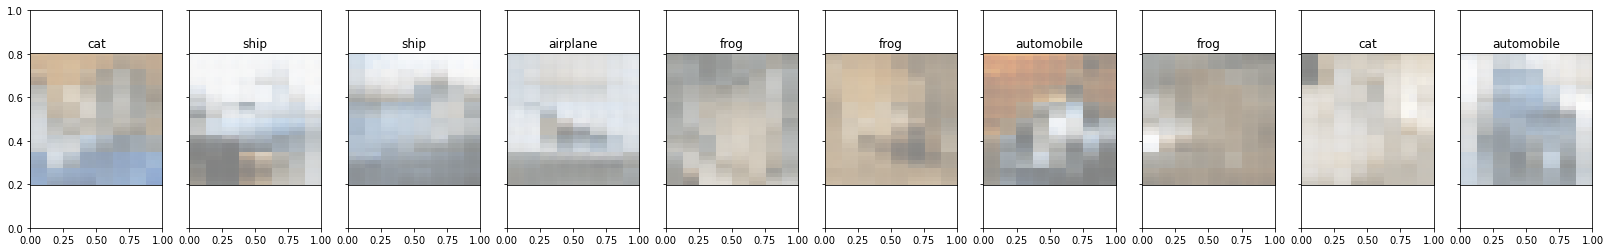

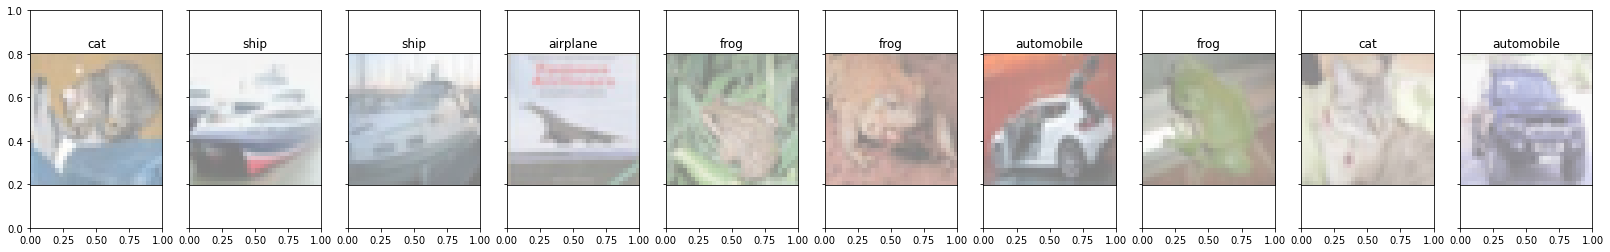

In [16]:
  # TODO: 6. plote as 10 primeiras imagens (reconstruídas e decodificadas)
  # do último batch  (usem o matplotlib)

import matplotlib.pyplot as plt
%matplotlib inline

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# test batch
dataiter = iter(test_loader)
images, labels = dataiter.next()


output = model(images)
images = images.numpy()
output = output.view(batch_size, 3, 32, 32)
output = output.detach().numpy()

# reconstruídas
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(28,4))
for i in np.arange(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    imshow(output[i])
    ax.set_title(classes[labels[i]])
    
# originais
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(28,4))
for i in np.arange(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    imshow(images[i])
    ax.set_title(classes[labels[i]])